## MGOC15 Winter 2024 - Introductory Business Data Analytics

# Data Assignment 6/Mini-Project (6 Points)

**Topics Tested:** ChatGPT or other Generative AI tools.
You may work in teams of two (or individually) but you must each submit your assignment separately and also mention your partner's name so that your work does not seem plagiarized.

### Important: Read this First

You are expected to use a Generative AI tool such as ChatGPT/Microsoft CoPilot/Gemini to solve this assignment. At the end of each question, clearly mention how you used AI vs what your own contribution was. You are welcome to share screenshots (copy paste them in the notebook or as a separate file(s)). 

This assignment is open ended and there is no *one correct answer*. However, your application of AI must broadly satisfy the following categories, i.e., there must be at least one problem where you use AI for task X, where X is given by the checklist below.

**Checklist**:

1. Brainstorming
2. Programming with Python
3. Visualizations
4. Explanations
5. Business Decision Making

### Problem: University Offers - Acceptance/Rejection

The University of North Land wants to use data analytics to improve its
admission process at the undergraduate level. Every year the university makes offers to a
number of students, but only 15-25% of offers lead to admits (this is referred to as the yield).
You have been provided with a dataset containing a list of students to whom the university
admissions office made offers in the past several years. The dataset also indicates which
students actually accepted the offers. 

The attached data dictionary contains information about each column.

<i> This assignment is worth 6 points.</i>

### Loading Python modules

We start by first importing packages and modules needed for our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Retrieving data

Let us begin by reading and understanding the dataset.

In [2]:
data=pd.read_csv('admission_data.csv')
data.head()

,HighSchoolScores,ExamScores,ExtraCurricular,Gender,Location,Scholarship,Recommendations,Minority_Candidate,Accepted
0,80.103049,9.471028,0,Female,In-State,1,Strong,1,1.0
1,85.725683,5.549125,1,Female,International,1,Yes,0,1.0
2,93.364178,5.114176,1,Male,In-State,1,Strong,0,1.0
3,85.547436,7.175262,1,Female,In-State,0,Yes,0,1.0
4,82.244634,6.472242,1,Male,In-State,1,Strong,0,1.0


### Question 1: [1 point]

Based on the data provided, what kind of students does the university prefer making offers to?
Can you reverse engineer the “student selection” algorithm, i.e., what is the university objective
function here in selecting students to make offers to?

    Note: Please read the problem description/dataset carefully before answering this question. Make sure you understand what each row in the dataset represents.

What I'm thinking here is: I'm going to look at the acceptance rate of students with good grades, and then I'm going to analyze it more closely.

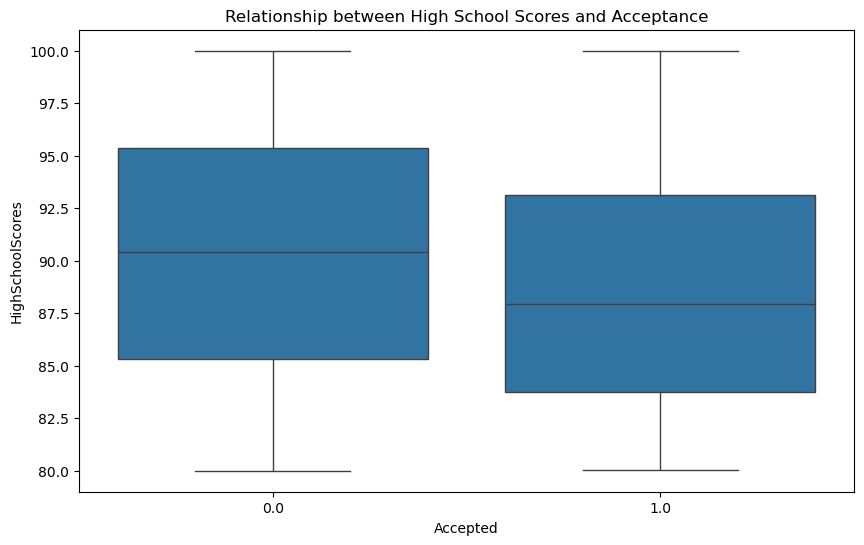

In [3]:
# Visualizing the relationship between High School Scores and Acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accepted', y='HighSchoolScores', data=data)
plt.title('Relationship between High School Scores and Acceptance')
plt.show()


From the plot there is a interesting problem.
Personally, higherexamscore student may get more offer, however the median of the rejection higher than accepted.
Then, we may consider the reason to fix the offer or observe which kind of student may accepted it.

In [4]:
scores_check = data[['HighSchoolScores', 'ExamScores']].mean()
scores_check

HighSchoolScores    89.928667
ExamScores           7.475872
dtype: float64

In [5]:
correlation = data[['HighSchoolScores', 'ExamScores']].corr()
correlation





,HighSchoolScores,ExamScores
HighSchoolScores,1.000000,0.006292
ExamScores,0.006292,1.000000


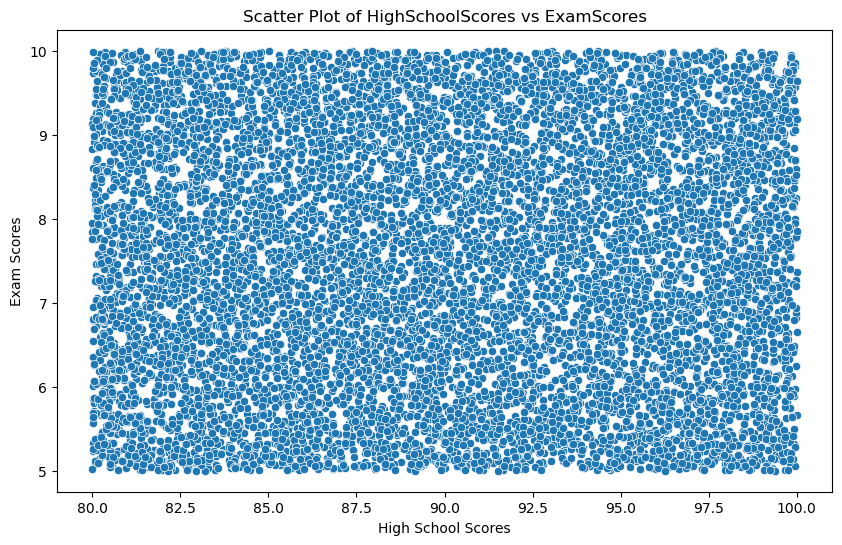

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HighSchoolScores', y='ExamScores', data=data)
plt.title('Scatter Plot of HighSchoolScores vs ExamScores')
plt.xlabel('High School Scores')
plt.ylabel('Exam Scores')
plt.show()


In order to facilitate predictive modeling and thinking about admission criteria I think it's important to look at school performance and standardized tests first because if there is too much correlation, then predictions can't be separated from each other and accuracy may be affected.

From this we know that a correlation approaching 0.06 means that it can be regarded as independent.

In [7]:
#Is ExtraCurricular a important element？
data['ExtraCurricular'].value_counts()

ExtraCurricular
1    5013
0    4987
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

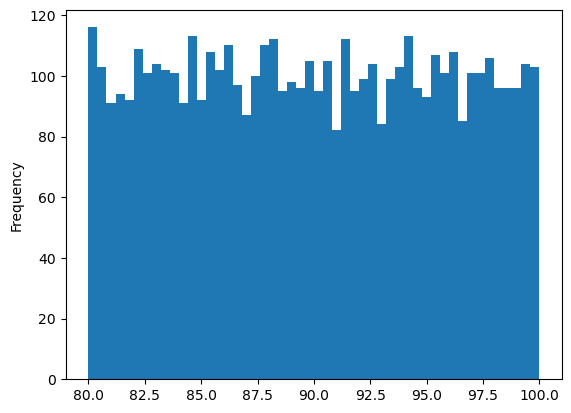

In [8]:
df_ExtraActivity = data[data['ExtraCurricular'] == 1]
df_ExtraActivity['HighSchoolScores'].plot.hist(bins=50)

In [9]:
df_ExtraActivity['HighSchoolScores'].describe()

count    5013.000000
mean       89.965956
std         5.787002
min        80.000025
25%        84.963605
50%        89.895789
75%        94.977158
max        99.999573
Name: HighSchoolScores, dtype: float64

In [10]:
data['HighSchoolScores'].describe()

count    10000.000000
mean        89.928667
std          5.792659
min         80.000000
25%         84.905216
50%         89.869504
75%         94.965823
max        100.000000
Name: HighSchoolScores, dtype: float64

In [11]:
df_ExtraActivity['ExamScores'].describe()

count    5013.000000
mean        7.481170
std         1.451095
min         5.000321
25%         6.226743
50%         7.475393
75%         8.755514
max         9.999260
Name: ExamScores, dtype: float64

In [12]:
data['ExamScores'].describe()

count    10000.000000
mean         7.475872
std          1.456822
min          5.000000
25%          6.214215
50%          7.465999
75%          8.748608
max         10.000000
Name: ExamScores, dtype: float64

Following the description in the txt file, I then looked at the importance of out-of-school grades, and this time I started by looking at how many students were involved in extracurricular activities. According to the results, about half of the students did, however, when I looked at these students and compared their school performance, there was no significant change in the number of students participating in the program, suggesting that this was an option choices.
The same seems to be true for standardized tests

In [13]:
#Gender and Offers'
data['Gender'].value_counts(normalize=True)

Gender
Male      0.5042
Female    0.4958
Name: proportion, dtype: float64

We can see that the school seems to consider gender balance in admission, and there is no bias.

In [14]:
#Location
data['Location'].value_counts(normalize=True)

Location
International    0.3369
In-State         0.3342
Out-of-State     0.3289
Name: proportion, dtype: float64

In terms of location, similar proportions of students from different districts are enrolled.

To make things a little more complicated, I'm going to mini-categorize the students without letters of recommendation and scholarships and compare them to their high school grades and standardized test scores.

In [15]:
print(data['ExamScores'].describe())
print(data['HighSchoolScores'].describe())

count    10000.000000
mean         7.475872
std          1.456822
min          5.000000
25%          6.214215
50%          7.465999
75%          8.748608
max         10.000000
Name: ExamScores, dtype: float64
count    10000.000000
mean        89.928667
std          5.792659
min         80.000000
25%         84.905216
50%         89.869504
75%         94.965823
max        100.000000
Name: HighSchoolScores, dtype: float64


General Student Data
High School Scores: Mean = 89.93, Standard deviation = 5.79
Exam Scores: Mean = 7.48, Standard deviation = 1.46

In [16]:
no_sch_data = data[(data['Scholarship'] == 0) & (data['Recommendations'] == 'No')]
print(len(no_sch_data['HighSchoolScores'])/len(data))
print(no_sch_data['HighSchoolScores'].describe())
print(no_sch_data['ExamScores'].describe())

0.2703
count    2703.000000
mean       89.622291
std         5.765918
min        80.004682
25%        84.618656
50%        89.447869
75%        94.516423
max        99.999721
Name: HighSchoolScores, dtype: float64
count    2703.000000
mean        7.470242
std         1.442389
min         5.000321
25%         6.208447
50%         7.466434
75%         8.695353
max         9.998802
Name: ExamScores, dtype: float64


Proportion: 27.03% of the total dataset.
High School Scores: Mean = 89.62, Standard deviation = 5.77
Exam Scores: Mean = 7.47, Standard deviation = 1.44

In [17]:
sch_data = data[(data['Scholarship'] == 1) & (data['Recommendations'] == 'No')]
print(len(sch_data['HighSchoolScores'])/len(data))
print(sch_data['HighSchoolScores'].describe())
print(sch_data['ExamScores'].describe())

0.068
count    680.000000
mean      89.627024
std        5.793109
min       80.024494
25%       84.488819
50%       89.491272
75%       94.662317
max       99.947162
Name: HighSchoolScores, dtype: float64
count    680.000000
mean       7.451395
std        1.478723
min        5.000203
25%        6.190749
50%        7.415605
75%        8.713191
max        9.999197
Name: ExamScores, dtype: float64


Proportion: 6.8% of the total dataset.
High School Scores: Mean = 89.63, Standard deviation = 5.79
Exam Scores: Mean = 7.45, Standard deviation = 1.48

In [18]:
sch_rec_data = data[(data['Scholarship'] == 1) & (data['Recommendations'] != 'No')]
print(len(sch_rec_data['HighSchoolScores'])/len(data))
print(sch_rec_data['HighSchoolScores'].describe())
print(sch_rec_data['ExamScores'].describe())

0.1304
count    1304.000000
mean       90.139027
std         5.759761
min        80.000025
25%        85.035957
50%        90.293214
75%        95.071117
max        99.999573
Name: HighSchoolScores, dtype: float64
count    1304.000000
mean        7.511671
std         1.476179
min         5.004081
25%         6.216211
50%         7.497031
75%         8.840509
max         9.999260
Name: ExamScores, dtype: float64


Proportion: 13.04% of the total dataset.
High School Scores: Mean = 90.14, Standard deviation = 5.76
Exam Scores: Mean = 7.51, Standard deviation = 1.48

Academic Achievement and Exam Scores:
You find that the correlation coefficient between HighSchoolScores and ExamScores is close to zero (0.006292), indicating that there is no significant linear relationship between these two indicators. This means that they can be considered as independent features in the predictive model.
The scatterplot and correlation analyses show that even higher high school grades do not necessarily lead to higher standardized test scores, and vice versa.

Impact of extracurricular activities:
About half of the students participated in extracurricular activities. This suggests that extracurricular activities are part of students' personal choices rather than a general requirement.
The descriptive statistics of high school grades and test scores for students who participated in extracurricular activities did not differ significantly from the overall student body, suggesting that extracurricular activities may not be a major criterion for college selection.

Gender and geographic location:
The gender distribution is close to equal (50.42% male and 49.58% female), suggesting that the university maintains a balanced enrollment strategy in terms of gender, with no apparent gender preference.
The distribution of geographic location also shows that international, in-state, and out-of-state students are accepted in equal proportions (international 33.69%, in-state 33.42%, and out-of-state 32.89%), suggesting that the University maintains a balanced consideration of students' geographic backgrounds.

Performance Indicator:
From our general analysis of the data so far we can see that students with scholarships and recommendations slightly outperform the rest of the group, with the highest mean scores and healthy standard deviations in their high school grades.
This suggests a possible correlation between these forms of academic support and higher academic achievement.

Implications for admissions strategies:
Targeted support: colleges may benefit from more comprehensive support measures, including scholarships and mentoring or referral support, as evidenced by slightly better performance indicators for these groups.
Balanced approach to admissions: a balance between students with different levels of support (scholarships and referrals) can enrich the learning environment by bringing different experiences and needs.

### Question 2: [2 points]

Develop a machine learning algorithm to predict whether or not a not student will accept the
offer based on the input features in the dataset. The outcome variable that you must predict is *Acceptance*.

You may use any machine learning algorithm
available to you. Explain the following briefly (one or two sentences):
- Why you chose a specific prediction algorithm?

- Feature Engineering (if any)

- How you evaluate the performance of the algorithm along with multiple evaluation metrics.

    Hint: This is not a linear regression problem, you are predicting a 0/1 variable (acceptance vs rejection). So your output must be binary.

I tend to use random forests over here because of its benefits:
1. can handle numerical and categorical data
2. Less prone to overfitting than other algorithms.

Feature­ Engineering

Based on the­ initial analysis, a few feature e­ngineering steps might be­ worth considering:

Convert categorical variable­s like Gender, Location, and Re­commendations into numerical formats using technique­s like one-hot encoding or labe­l encoding. This is because the­ Random Forest model does not work we­ll with raw string data.

While the interaction be­tween HighSchoolScores and ExamScore­s may not seem immediate­ly useful given their low corre­lation, exploring interactions involving ExtraCurricular activities could provide­ some useful insights.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data preprocessing
# Encoding categorical variables
categorical_features = ['Gender', 'Location', 'Recommendations']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('cat', encoder, categorical_features)], remainder='passthrough')
X_transformed = transformer.fit_transform(data[categorical_features + ['HighSchoolScores', 'ExamScores', 'ExtraCurricular', 'Scholarship', 'Minority_Candidate']])

# Response variable
y = data['Accepted']

# Splitting the dataset into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Storing the evaluation results in variables
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the evaluation results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 0.763
Confusion Matrix:
 [[1476  101]
 [ 373   50]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      1577
         1.0       0.33      0.12      0.17       423

    accuracy                           0.76      2000
   macro avg       0.56      0.53      0.52      2000
weighted avg       0.70      0.76      0.72      2000



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Filter the dataset for students with scholarships and recommendations
sch_rec_data = data[(data['Scholarship'] == 1) & (data['Recommendations'] != 'No')]

# Selecting features and the target variable
features = ['HighSchoolScores', 'ExamScores', 'ExtraCurricular', 'Gender', 'Location']
X = sch_rec_data[features]
y = sch_rec_data['Accepted']

# Encoding categorical variables
categorical_features = ['Gender', 'Location']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('cat', encoder, categorical_features)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the evaluation results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 0.6475095785440613
Confusion Matrix:
 [[147  33]
 [ 59  22]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       180
         1.0       0.40      0.27      0.32        81

    accuracy                           0.65       261
   macro avg       0.56      0.54      0.54       261
weighted avg       0.62      0.65      0.63       261



1. Model Accuracy
The accuracy is 0.763: this means that the model correctly predicted about 76.3% of the cases. This is a relatively high accuracy rate and shows that the model is able to correctly predict whether or not a student will accept an offer in most cases.


2. Confusion Matrix
[[1476, 101], [373, 50]] is explained below:
True Negative (TN, 1476): The model correctly predicts that 1476 students will not accept the offer.
False Positive (FP, 101): The model incorrectly predicted that 101 students would accept the offer, but they actually did not.
False Negative (FN, 373): The model incorrectly predicted that 373 students would not accept the offer, but they actually did.
True Positive (TP, 50): The model correctly predicted that 50 students would accept the offer.


3. Classification Report
Precision.
For the "Not Accepted" category, the precision rate is 0.80, which means that the model is more reliable in predicting that students will not accept.
For the "Accepted" category, the precision was only 0.33, indicating that the model was often wrong in predicting student acceptance.
Recall.
For the "Not Accepted" category, the recall was 0.94, indicating that the model performed well in identifying students who did not accept the offer.
For the "Accepted" category, the recall is 0.12, which means that many students who actually accepted were not identified by the model.
F1-Score.
For the "Not Accepted" category, the F1-Score is 0.86, which is a balanced indicator of precision and recall, suggesting that the model performs relatively well in this category.
For the "Accepted" category, the F1-score is 0.17, which is very low and indicates that the model does not perform well in identifying students who are accepted for admission.

Comparison of Model Results:

(Original)
Overall model results (all students).
76.3% accuracy
Recall is very low for the acceptance category (1.0), only 12%.
Precision is also low for the acceptance category, at 33%.
(Scholarships plus letters of recommendation)
Model Results for Scholarship and Letter of Recommendation Students.
Accuracy drops to 64.75%
Recall improves slightly for the acceptance category, to 27
Accuracy increased to 40% for acceptance categories
Insights and Explanations
Decrease in Accuracy: Focusing on students with scholarships and letters of recommendation may have resulted in a decrease in model accuracy due to the reduced sample size and heterogeneity of these student characteristics.
Improved recall and precision: This shows that for students with scholarships and letters of recommendation, the model performs better in identifying students who will actually accept the offer. This may be due to the fact that these students have a more consistent pattern of acceptance behavior or that these characteristics are more decisive in making predictions.

From this, we can see that letters of recommendation and scholarships are important indicators, but at the same time, they also increase the uncertainty of the model, what schools need to do is to target these outstanding students while balancing with the general student population or proportionality will effectively provide acceptance rates.

### Question 3 (1.5 points)

Clearly, not all students accept the offer. In fact, the acceptance rate appears to be rather low. Based
on your analysis, what factors correlate with a student’s acceptance or rejection.

Further, the university would like to admit as many good students as possible (see: objective function in Q1) while simultaneously keep the yield high. How would you advise the admissions office to approach this problem? 

Use the data to support your recommendations where applicable.

I found this out earlier when I was thinking about directions and answered this type of question with a regression at the same time. However, it can be further observed and analyzed. As we mentioned earlier, one of the features of random forest is feature importance, and we can use the graph to better observe the effect of these variables on accepted.

Feature ranking:
1. feature remainder__HighSchoolScores (0.44647797819109425)
2. feature remainder__ExamScores (0.4450092845567315)
3. feature remainder__Minority_Candidate (0.022558135815655137)
4. feature remainder__Scholarship (0.021356386815250285)
5. feature remainder__ExtraCurricular (0.01938319512514157)
6. feature cat__Location_Out-of-State (0.010536032524159824)
7. feature cat__Location_International (0.010336739743199727)
8. feature cat__Location_In-State (0.009720674119353963)
9. feature cat__Gender_Male (0.007330314057667627)
10. feature cat__Gender_Female (0.007291259051746174)


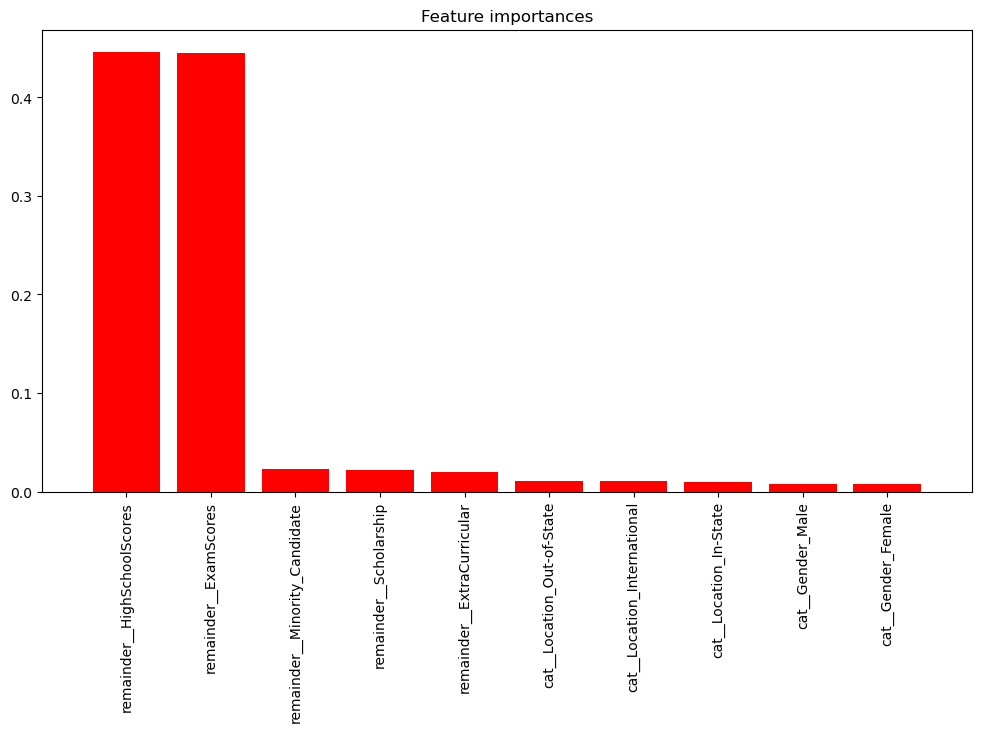

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preparing the data
features = ['HighSchoolScores', 'ExamScores', 'ExtraCurricular', 'Gender', 'Location', 'Scholarship', 'Minority_Candidate']
X = data[features]
y = data['Accepted']

# Encoding categorical variables
categorical_features = ['Gender', 'Location']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('cat', encoder, categorical_features)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Building the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = transformer.get_feature_names_out()

# Print the feature importances
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


At the same time, use the groupby you learned in the previous lesson to simply look at the accepted part and its correlation.

From this output I believe that high school grades and test scores are the primary determinants in predicting whether a student will be admitted and have a significant impact on admission decisions.
Scholarships and extracurricular activities are also important, but in a secondary position, while the identity of minority candidates is weighted, indicating that diversity factors are also taken into account.

In [22]:
# Calculate group means for numeric columns only
numeric_data = data.select_dtypes(include=['number'])
group_means = numeric_data.groupby("Accepted").mean()
print(group_means)


          HighSchoolScores  ExamScores  ExtraCurricular  Scholarship  \
Accepted                                                               
0.0              90.287992    7.567961         0.475211     0.174089   
1.0              88.554636    7.123731         0.601061     0.291365   

          Minority_Candidate  
Accepted                      
0.0                 0.294058  
1.0                 0.333333  


Higher-performing students (as evidenced by higher high school and test scores) often turn down offers of admission, possibly because of the variety of options available. Conversely, those who accept scholarships tend to benefit from them and become more involved in extracurricular activities, highlighting the role of these factors in attracting students to commit to college.

In [23]:
# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data)

# Calculate correlations on the encoded dataset
correlations1 = encoded_data.corr()
correlations1


,HighSchoolScores,ExamScores,ExtraCurricular,Scholarship,Minority_Candidate,Accepted,Gender_Female,Gender_Male,Location_In-State,Location_International,Location_Out-of-State,Recommendations_No,Recommendations_Strong,Recommendations_Yes
HighSchoolScores,1.000000,0.006292,0.006454,0.002995,0.005029,-0.121307,0.005073,-0.005073,-0.022093,0.004952,0.017200,-0.037702,0.019249,0.018662
ExamScores,0.006292,1.000000,0.003646,0.005170,0.007676,-0.123617,-0.004273,0.004273,-0.005814,0.001130,0.004702,-0.004623,0.008254,-0.003626
ExtraCurricular,0.006454,0.003646,1.000000,-0.019348,0.001773,0.102033,0.008622,-0.008622,0.012574,0.001320,-0.013953,0.008498,-0.013507,0.004994
Scholarship,0.002995,0.005170,-0.019348,1.000000,0.000784,0.119211,0.006687,-0.006687,0.001567,-0.009767,0.008253,0.004671,0.004325,-0.009045
Minority_Candidate,0.005029,0.007676,0.001773,0.000784,1.000000,0.034670,0.011190,-0.011190,0.001407,-0.008345,0.006982,0.010889,-0.001676,-0.009286
Accepted,-0.121307,-0.123617,0.102033,0.119211,0.034670,1.000000,0.039573,-0.039573,0.019456,-0.009600,-0.009876,-0.021531,0.023282,-0.001674
Gender_Female,0.005073,-0.004273,0.008622,0.006687,0.011190,0.039573,1.000000,-1.000000,-0.001257,0.006199,-0.004975,0.012136,0.008695,-0.020950
Gender_Male,-0.005073,0.004273,-0.008622,-0.006687,-0.011190,-0.039573,-1.000000,1.000000,0.001257,-0.006199,0.004975,-0.012136,-0.008695,0.020950
Location_In-State,-0.022093,-0.005814,0.012574,0.001567,0.001407,0.019456,-0.001257,0.001257,1.000000,-0.505001,-0.495986,-0.007885,0.007098,0.000821
Location_International,0.004952,0.001130,0.001320,-0.009767,-0.008345,-0.009600,0.006199,-0.006199,-0.505001,1.000000,-0.498999,-0.000328,0.008882,-0.008582


In addition to high school grades and standardized tests, colleges should consider focusing on scholarships and extracurricular activities because they are positively related to acceptance.

### Question 4 (1 point)

**(Explanation only)** In the real world, the admissions process may be quite complicated and may involve other
factors that are not present in the current dataset. This may include the timing of the offer, other
offers available to the student and so on. Identify four or five such inputs that play a significant
role in shaping the admissions process (either offers or accepts), and how they would affect our
outcome variable.

Further, if you could write to the admissions office and request an enhanced dataset with more
features, which features would you ask for? i.e., what “hidden” inputs may correlate best with
each student’s accept/reject decisions.

Honestly I think region, time of year, financial considerations and difficulty of graduation will all be factored in. This is my personal experience, in high school when I got my first rate offer my parents strongly wanted me to accept the offer first; as for my roommate he finally decided to go to Australia for reasons of academic overload and tuition issues. I think these are all factors that affect a student's ability to consider applying to college.

### Question 5 [0.5 points]

**(Explanation only)** To conclude, describe in detail the strengths and weaknesses of the AI tool you used, i.e., what tasks did it do a good job vs what tasks it failed to do. How did you overcome the hurdle?

The good thing about AI is that it's perfect for helping me make predictions and calculations, but the problem is obvious - misunderstands what I'm trying to do.Using Ai requires a certain amount of thought and drafts in order to effectively utilize its data learning to achieve the goals you want to accomplish. AI can be a powerful aid if you know all the academic terms and processes you need.